# TP1 Audionumérique Parole et Musique (3EN ENSEEIHT)

> Répondez aux questions du notebook (dans les cadres CODE et TEXTE). Soyez le plus précis possible et soignez le code.
> Sauvegardez le notebook et ensuite téléchargez le code .ipynb Déposez ce fichier sur la zone de dépot du moodle avant le prochain TP.

**NOM** : MACHADO SANTOS ROHDE Pedro & ZAMBRANA PRADO Rodrigo

**Prénom** :

**Email** : pedro.machadosantosrohde@etu.enseeiht.fr & rodrizp@gmail.com



Initialisation de l'environnement de TP

In [0]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/f/file/libmagic-mgc_5.32-2ubuntu0.2_amd64.deb  404  Not Found [IP: 91.189.88.149 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/f/file/libmagic1_5.32-2ubuntu0.2_amd64.deb  404  Not Found [IP: 91.189.88.149 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
Cloning into 'tp-3en-n7'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 116 (delta 15), reused 0 (delta 0)
Receiving objects: 

In [0]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

In [0]:
!ls tp-3en-n7/signaux/


alpha		Loc1V1.wav	Loc1V2.wav	Loc2V1.wav
Loc1V1norm.wav	Loc1V2norm.wav	Loc2V1norm.wav


Utilisez la fonction scipy.io.wavfile.read pour charger le signal [Loc1V1.wav](https://www.irit.fr/~Jerome.Farinas/N73EN/res/Loc1V1.wav) (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [0]:

(fe,signal) =  scipy.io.wavfile.read('tp-3en-n7/signaux/Loc1V1.wav')
print(fe)

16000




- Oui



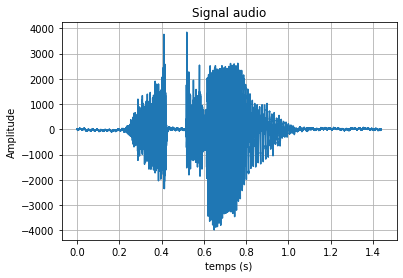

In [0]:
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [0]:
# lecture du fichier
Audio(data=signal, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

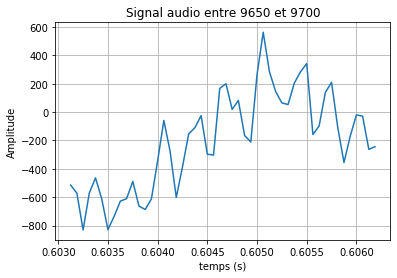

In [0]:
# Affichage des échantillons entre 9650 et 9700

plt.figure(1)
plt.plot(np.arange(9650,9700)/fe,signal[9651:9701])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio entre 9650 et 9700')
plt.grid(True)
plt.show()

Affichage du spectrogramme  : 

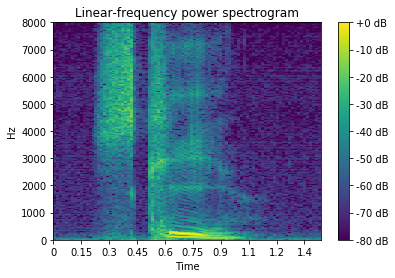

In [0]:
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [0]:
Audio(data=signal, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [0]:
Audio(data=signal, rate=fe*2)

Q : ***Qu'obversez vous au niveau des fréquences ? Est-ce normal ?***

Votre réponse : Lorsqu'on diminue Fe le son devient plus grave (plus "lent") et quand on l'augmente il devien plus aigu (plus "rapide"). C'est ce qu'on attendait.

Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Votre réponse : D'après la diapo 37 du cours, la parole ne dépasse pas les 8kHz, donc une Fe de 16kHz est bien adaptée à sa numérisation.

Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées.***

Il y en a 3 : s k i.
On les a séparés déterminant, sur le signal, qu'on avait le [s] qui correspond au "bruit" au début et jusq'au silence. Après, le silence suivi d'une forte impulsion (visible aussi sur le spectre), ce qui est caractéristique des consonnes occlusives, comme le [k]. Et, finalement, la présence des harmoniques sur le spectre nous indique la présence d'un son voisé, et on détermine qu'il s'agit du [i].

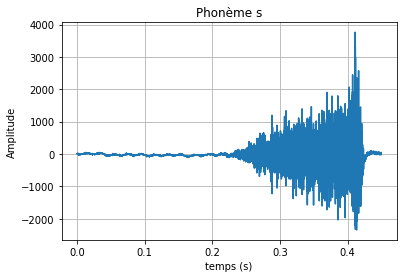

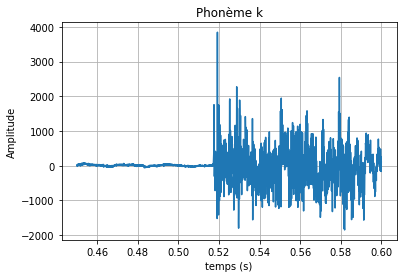

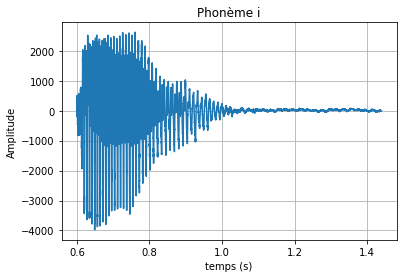

In [0]:
phon_s = signal[0:7200]
phon_k = signal[7201:9600]
phon_i = signal[9601:]

plt.figure(1)
plt.plot(np.arange(0,7200)/fe,signal[0:7200])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Phonème s')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(np.arange(7201,9600)/fe,signal[7201:9600])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Phonème k')
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(np.arange(9601,23021)/fe,signal[9601:])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Phonème i')
plt.grid(True)
plt.show()

Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***

Votre réponse : Un son non-voisé n'utilise pas la vibration des cordes vocales et le son voisé oui. E.g.: [p] : non-voisé; [b] : voisé

***Isolez dans des variables séparées une fenetre de 512 poits de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

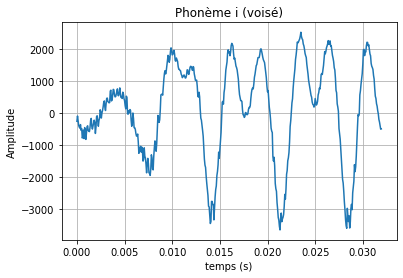

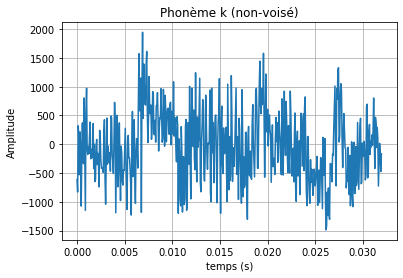

In [0]:
fen_voise = phon_i[100:612]
fen_nvoise = phon_k[1500:2012]

plt.figure(1)
plt.plot(np.arange(512)/fe,fen_voise)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Phonème i (voisé)')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(np.arange(512)/fe,fen_nvoise)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Phonème k (non-voisé)')
plt.grid(True)
plt.show()

***Observez maintenant le signal Loc1V1 entre les échantillons 9650 et 17500. Vous observez alors un unique phonème. Celui-ci peut être séparé en trois zones. Proposez un découpage et justifiez votre choix en faisant le lien avec le système de production de la parole.***

Votre réponse : On pourrait séparer ce signal en trois parties, le début du son qui correspondrait à la vibration des cordes vocales, suivie par la partie de la résonance dans le conduit bucal, et finalement, l'atténuation dans l'air. 

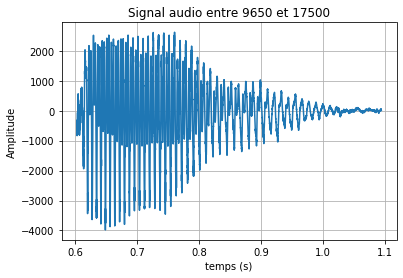

In [0]:
plt.figure(1)
plt.plot(np.arange(9650,17500)/fe,signal[9650:17500])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio entre 9650 et 17500')
plt.grid(True)
plt.show()

***Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations. ***

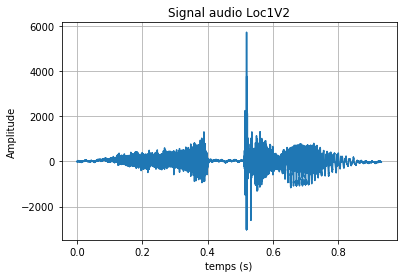

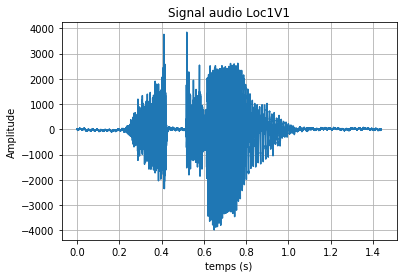

In [0]:
(fe2,signal2) =  scipy.io.wavfile.read('tp-3en-n7/signaux/Loc1V2.wav')

plt.figure(1)
plt.plot(np.arange(len(signal2))/fe2,signal2)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc1V2')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc1V1')
plt.grid(True)
plt.show()

In [0]:
Audio(data=signal2,rate=fe2)

In [0]:
Audio(data=signal,rate=fe)

***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

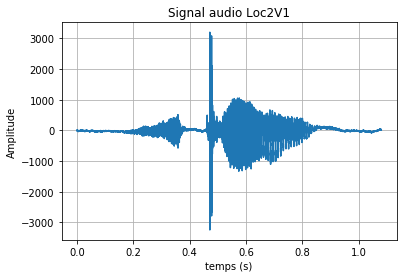

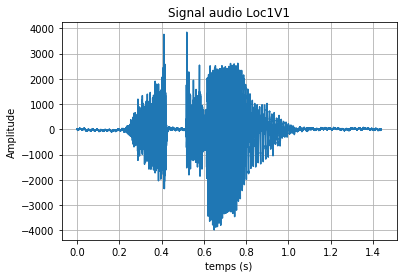

In [0]:
(fe3,signal3) =  scipy.io.wavfile.read('tp-3en-n7/signaux/Loc2V1.wav')

plt.figure(1)
plt.plot(np.arange(len(signal3))/fe3,signal3)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc2V1')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc1V1')
plt.grid(True)
plt.show()


In [0]:
Audio(data=signal3,rate=fe3)

Les différences entre les deux peuvent être liées aux différences physiologiques (conduit bucal différent etc.) et aussi les différences socio-culturelles (accent)

***Enregistrez votre propre voix (vous pouvez utiliser le programme wavsurfer). Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal, le spectrogramme et repérez les différents phonèmes qui composent votre production. Comparez avec ce qui a été fait en cours.***

In [0]:
from google.colab import files
uploaded = files.upload()
!ls

Saving debussy.wav to debussy.wav
debussy.wav  sample_data  tp-3en-n7


In [0]:
(feD,signalD) =  scipy.io.wavfile.read('debussy.wav')
signalD = (signalD[:,0]+signalD[:,1])/2
print(feD)

48000


In [0]:
Audio(data=signalD,rate=feD)

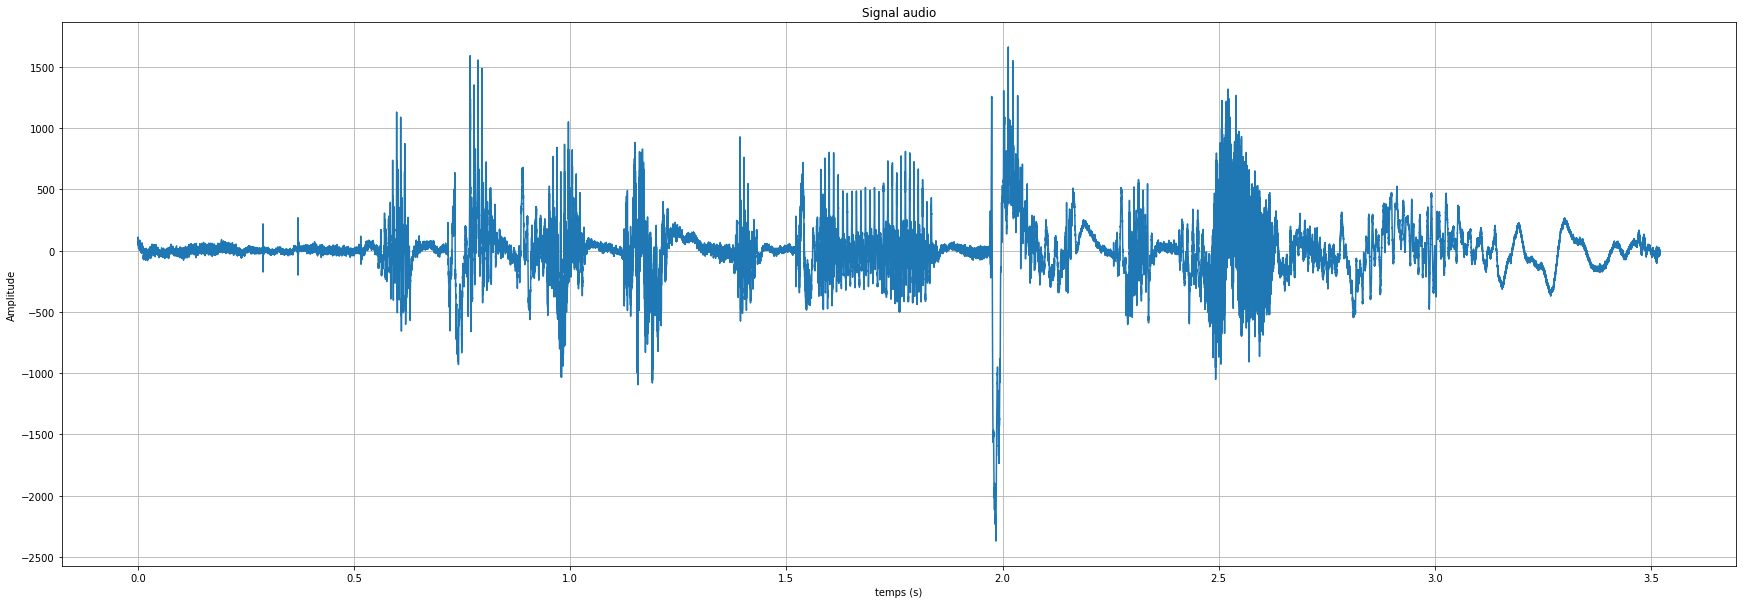

In [0]:
# Affichage du signal
plt.figure(1,figsize=(30,10))
plt.plot(np.arange(len(signalD))/feD,signalD)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

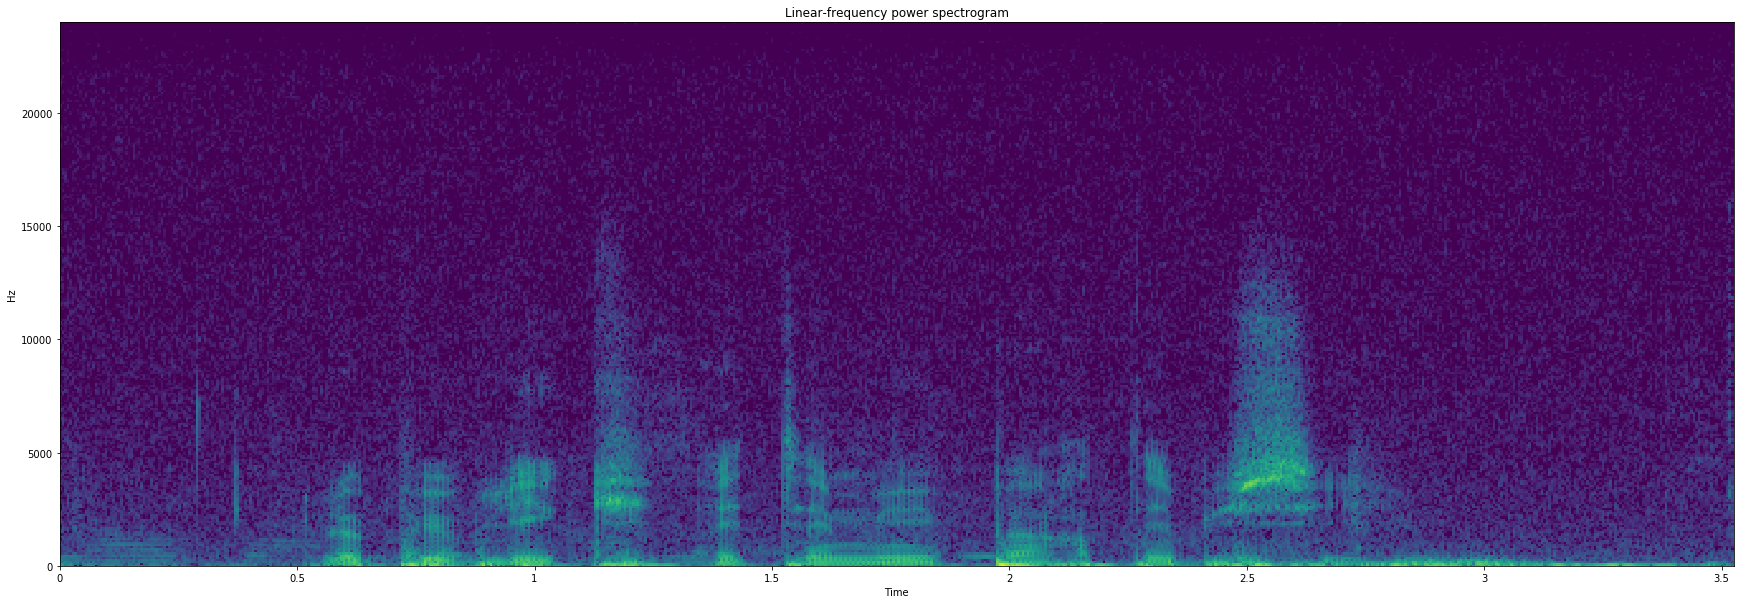

In [0]:
d, sr = librosa.load('debussy.wav', sr=feD, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(30,10))
librosa.display.specshow(sp, sr=feD, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
#plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

On y voit bien les phonèmes attendus. On remarque surtout le [s] à ~2.5-2.6s.


***Concluez sur cette partie en prenant en considération le nombre important de causes extérieures de la variabilité temporelle du signal de parole. Ces phénomènes limitent les possibilités d’une analyse plus poussée dans le domaine temporel dans lequel le signal de parole se comporte comme un signal aléatoire.***

Le bruit, l'interlocuteur, l'accent, le prosodie, le rythme... tous ces élements jouent sur la variabilité temporelle du signal de parole. C'est pour cela qu'une analyse plus poussée dans le domaine temporel est impossible. Par contre, on observe que le spéctrogramme garde des élements en commun entre les réalisations et est donc une manière plus adaptée d'analyser la parole.